<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Youtube_Video_Transcript_Summarization_with_Hugging_Face_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

     |████████████████████████████████| 2.9 MB 2.5 MB/s 
     |████████████████████████████████| 3.3 MB 32.4 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 636 kB 69.3 MB/s 
     |████████████████████████████████| 895 kB 67.4 MB/s 


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [ ]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'A4OmtyaBHFE'

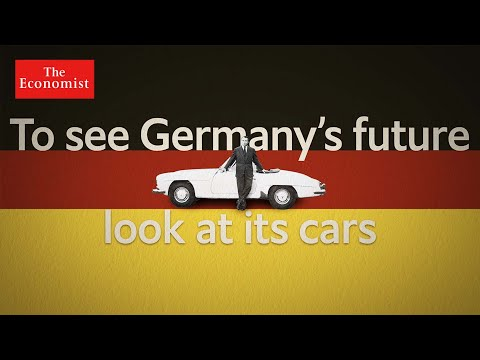

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [ ]:
transcript[0:5]

[{'duration': 4.96,
  'start': 1.52,
  'text': "for germany it's the end of an era"},
 {'duration': 5.279,
  'start': 4.4,
  'text': "and as europe's biggest economy there"},
 {'duration': 4.72, 'start': 6.48, 'text': 'are some huge challenges ahead'},
 {'duration': 3.681, 'start': 9.679, 'text': 'from its increasingly complex'},
 {'duration': 3.12,
  'start': 11.2,
  'text': 'relationship with china to climate'}]

In [ ]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

9081


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 for germany it's the end of an era and as europe's biggest economy there are some huge challenges ahead from its increasingly complex relationship with china to climate change all eyes will be on how germany's new leaders grapple with these issues but there's one german industry that reveals a lot about the country's prospects it's cars traditionally the car industry here has been very powerful there have been open doors to german ministries to the chancellory germany's car industry is a vital part of its economy with links to government that go back decades how this world-renowned motor industry navigates the challenges ahead could tell you more than you think about germany's future [Music] the curves the precision it's cutting-edge engineering like this that has helped place car makers at the heart of the german economy and the industry has proved a bellwether for the country's future prospects too since the 70s car exports have risen with germany's wealth and influence 

Your min_length is set to 56, but you input_length is only 20. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 20. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


Summarized text
 The economist's assessment of germ. ormation says germany has to do better right we have very big companies those very big players here but they aren't the disrupter . The driver behind innovation disruption comes always from new young companies which drive change german startups rarely grow into tech giants without making changes .
input text 
any's future after angela merkel click the link and don't forget to subscribe you
Summarized text
 any's future after angela merkel click the link and don't forget to subscribe you to the Daily Mail . any of us will be happy to see the future of Angela Merkel in the U.S. after Angela . Merkel's future is in the hands of Angela Merkel . any . merkel .


In [ ]:
len(str(summarized_text))

4372

In [ ]:
str(summarized_text)

'[\' I want to thank every American who participated in this election whether you voted for the very first time or weighted it in wine for a very long time . We are an American family and we rise or fall together as one nation and as one people tonight . We know in our hearts but for the United States of America the best is yet to come .\', \' President Obama congratulates Mitt Romney and Paul Ryan on a hard-fought campaign . Michelle Obama says she has never been prouder to Michelle Obama . Biden says he has never loved Michelle Obama more than he has loved her . Biden: "I wouldn\\\'t be the man I am today without the woman who agreed to marry me 20 years ago"\', " The president says he is proud of his campaign team and volunteers in the history of politics the best the best ever . He says he will always be grateful for everything that you\'ve done and all the incredible work that you put in . \'I know that political campaigns can sometimes seem small even silly and that provides plen